## Assignment 2

In [137]:
class Node():
    def __init__(self, label, key):
        self.key = key
        self.label = label
   
    def __eq__(self, n):
        if self.key == n.key and self.label == n.label:
            return True
        else:
            return False

In [2]:
class Vertex():
    def __init__(self, fromVert, toVert, weight=1):
        self._fromVert = fromVert
        self._toVert = toVert
        self._weight = weight
        
    def __repr__(self):
        nodeList = [self._fromVert, self._toVert, self._weight]
        return '{}\n'.format(str(nodeList))
        
    def includes(self, vertKey):
        return True if self._fromVert == vertKey or self._toVert == vertKey else False
    
    def returnSecondVert(self, vertKey):
        if self.includes(vertKey):
            if self._fromVert == vertKey:
                return self._toVert
            else:
                return self._fromVert
        return None
    
    def getDotRepr(self):
        return '{fVert} -- {tVert}'.format(fVert=self._fromVert, tVert=self._toVert)

In [117]:
class Graph():
    def __init__(self, nodes=[]):
        self._nodes = set(nodes)
        self._edges = []
        
    def __contains__(self, vertKey):
        for node in self._nodes:
            if node == vertKey:
                return True
        return False
    
    def addVertex(self, node):
        _nodes.append(node)
    
    def addVerticesFromList(self, vertList):
        _nodes.append(vert for vert in vertList)
    
    def addEdge(self, fromVert, toVert):
        self._nodes.add(fromVert)
        self._nodes.add(toVert)
        self._edges.append(Vertex(fromVert, toVert, 1))
        
    def addWeightedEdge(self, fromVert, toVert, weight):
        self._nodes.add(fromVert)
        self._nodes.add(toVert)
        self._edges.append(Vertex(fromVert, toVert, 1))
    
    def addEdgesFromList(self, edgeList):
        self._edges.append(edge for edge in edgeList)
        
    def getVertices(self):
        return self._nodes
    
    def getEdges(self):
        return self._edges

    def getNeighbors(self, vertKey):
        neighbors = []
        for edge in self._edges:
            if edge.returnSecondVert(vertKey) != None:
                neighbors.append(edge.returnSecondVert(vertKey))
        return neighbors

    def saveGraph(self, name='example_graph'):
        lines = 'graph {n} {{ \n'.format(n=name)
        for edge in self._edges:
            lines += '\t{dotEdge}\n'.format(dotEdge=edge.getDotRepr())
        lines += ('}')
        return lines

    def getShortestPathDict(self, fromVert):
        iterator = 1
        nodeDict = {fromVert:iterator-1}
        nextStepNodes = self.getNeighbors(fromVert)
        for node in nextStepNodes:
            nodeDict[node] = iterator
        tocheck = nextStepNodes
        while len(nodeDict.keys()) < len(self._nodes):
            tocheck = [i for i in nodeDict if nodeDict[i]==iterator]
            for vert in tocheck:
                nextStepNodes = self.getNeighbors(vert)
                for node in nextStepNodes: 
                    if node not in nodeDict.keys():
                        nodeDict[node] = iterator+1
            iterator += 1
        return nodeDict
    
    def getShortestPaths(self, fromVert):
        lines = ""
        pathsDict = self.getShortestPathDict(fromVert)
        for key in pathsDict.keys():
            lines += key + ": " + str(pathsDict[key]) + "\n"
        return lines

In [130]:
g = Graph()

In [131]:
g.addEdge('Alice', 'Bob')
g.addEdge('Carl', 'Alice')
g.addEdge('Alice', 'David')
g.addEdge('Alice', 'Frank')
g.addEdge('Alice', 'Ernst')
g.addEdge('Bob', 'Gail')
g.addEdge('Gail', 'Harry')
g.addEdge('Harry', 'Jen')
g.addEdge('Jen', 'Gail')
g.addEdge('Harry', 'Irene')
g.addEdge('Irene', 'Gail')
g.addEdge('Irene', 'Jen')
g.addEdge('Ernst', 'Frank')
g.addEdge('David', 'Carl')
g.addEdge('Carl', 'Frank')

In [132]:
print(g.getVertices())

{'Harry', 'Alice', 'Irene', 'Frank', 'Ernst', 'David', 'Carl', 'Jen', 'Gail', 'Bob'}


In [133]:
print(g.getEdges())

[['Alice', 'Bob', 1]
, ['Carl', 'Alice', 1]
, ['Alice', 'David', 1]
, ['Alice', 'Frank', 1]
, ['Alice', 'Ernst', 1]
, ['Bob', 'Gail', 1]
, ['Gail', 'Harry', 1]
, ['Harry', 'Jen', 1]
, ['Jen', 'Gail', 1]
, ['Harry', 'Irene', 1]
, ['Irene', 'Gail', 1]
, ['Irene', 'Jen', 1]
, ['Ernst', 'Frank', 1]
, ['David', 'Carl', 1]
, ['Carl', 'Frank', 1]
]


In [134]:
print(g.saveGraph())

graph example_graph { 
	Alice -- Bob
	Carl -- Alice
	Alice -- David
	Alice -- Frank
	Alice -- Ernst
	Bob -- Gail
	Gail -- Harry
	Harry -- Jen
	Jen -- Gail
	Harry -- Irene
	Irene -- Gail
	Irene -- Jen
	Ernst -- Frank
	David -- Carl
	Carl -- Frank
}


Graph generated with dot representation

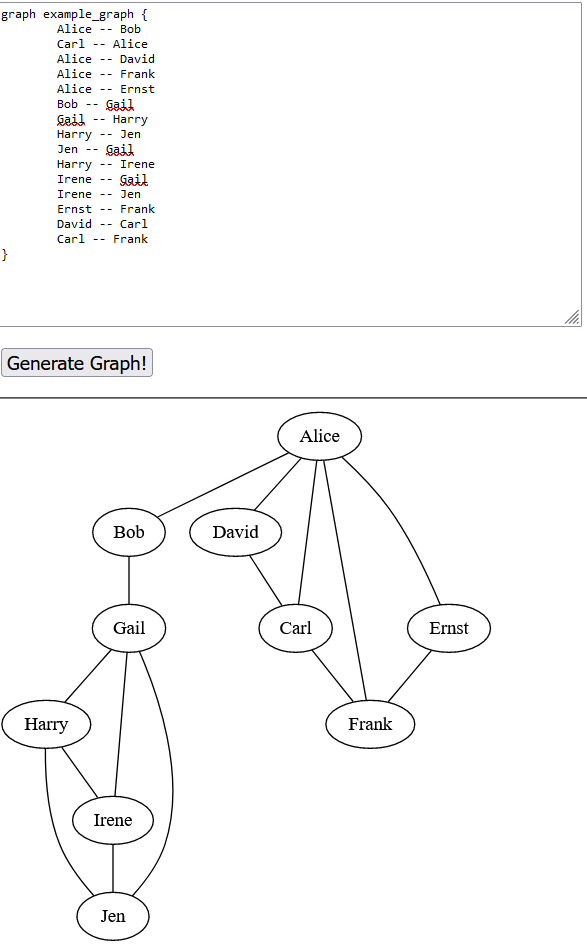

In [135]:
print(g.getNeighbors('Alice'))

['Bob', 'Carl', 'David', 'Frank', 'Ernst']


In [136]:
print(g.getShortestPaths('Alice'))

Alice: 0
Bob: 1
Carl: 1
David: 1
Frank: 1
Ernst: 1
Gail: 2
Harry: 3
Jen: 3
Irene: 3



In [ ]:
g.addEdge(Node'Alice', 'Bob')
g.addEdge('Carl', 'Alice')
g.addEdge('Alice', 'David')
g.addEdge('Alice', 'Frank')
g.addEdge('Alice', 'Ernst')
g.addEdge('Bob', 'Gail')
g.addEdge('Gail', 'Harry')
g.addEdge('Harry', 'Jen')
g.addEdge('Jen', 'Gail')
g.addEdge('Harry', 'Irene')
g.addEdge('Irene', 'Gail')
g.addEdge('Irene', 'Jen')
g.addEdge('Ernst', 'Frank')
g.addEdge('David', 'Carl')
g.addEdge('Carl', 'Frank')